In [1]:
#-----------------------------------------
# Title: Regression Splines With Abalone Dataset
# Subtitle: DDS-8555, Assignment 4, Part 2
# Author: Madgene Moise
# Date: Sunday, June 8, 2025
#-----------------------------------------

In [2]:
# Import necessary libraries after reset
import pandas as pd

In [3]:
# Load the training and testing datasets
train_df = pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv") 
test_df = pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")

# Display the first few rows of each dataset to understand structure
train_df.head(), test_df.head()

(   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
 0   0   F   0.550     0.430   0.150        0.7715          0.3285   
 1   1   F   0.630     0.490   0.145        1.1300          0.4580   
 2   2   I   0.160     0.110   0.025        0.0210          0.0055   
 3   3   M   0.595     0.475   0.150        0.9145          0.3755   
 4   4   I   0.555     0.425   0.130        0.7820          0.3695   
 
    Whole weight.2  Shell weight  Rings  
 0          0.1465        0.2400     11  
 1          0.2765        0.3200     11  
 2          0.0030        0.0050      6  
 3          0.2055        0.2500     10  
 4          0.1600        0.1975      9  ,
       id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
 0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
 1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
 2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
 3  90618   M   0.570     0.490  

In [4]:
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Encode 'Sex' as dummy variables and prepare the formula with splines
spline_formula = (
    "Rings ~ bs(Length, df=5) + bs(Diameter, df=5) + bs(Height, df=5) + "
    "bs(`Whole weight`, df=5) + bs(`Whole weight.1`, df=5) + bs(`Whole weight.2`, df=5) + "
    "bs(`Shell weight`, df=5) + C(Sex)"
)

In [5]:
# Rename columns to remove periods and replace with underscores for compatibility with patsy
train_df_clean = train_df.rename(columns=lambda x: x.replace('.', '_').strip())
test_df_clean = test_df.rename(columns=lambda x: x.replace('.', '_').strip())

# Redefine the formula using cleaned column names
spline_formula_clean = (
    "Rings ~ bs(Length, df=5) + bs(Diameter, df=5) + bs(Height, df=5) + "
    "bs(Whole_weight, df=5) + bs(Whole_weight_1, df=5) + bs(Whole_weight_2, df=5) + "
    "bs(Shell_weight, df=5) + C(Sex)"
)

# Check the actual column names after renaming
train_df_clean.columns.tolist()

['id',
 'Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight_1',
 'Whole weight_2',
 'Shell weight',
 'Rings']

In [6]:
# Replace both spaces and periods with underscores in the column names
train_df_clean.columns = train_df_clean.columns.str.replace(r"[.\s]+", "_", regex=True)
test_df_clean.columns = test_df_clean.columns.str.replace(r"[.\s]+", "_", regex=True)

# Confirm new column names
train_df_clean.columns.tolist()

['id',
 'Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Whole_weight_1',
 'Whole_weight_2',
 'Shell_weight',
 'Rings']

In [7]:
# Fit the regression spline model using these cleaned names.

# Define the spline regression formula with updated column names
spline_formula_fixed = (
    "Rings ~ bs(Length, df=5) + bs(Diameter, df=5) + bs(Height, df=5) + "
    "bs(Whole_weight, df=5) + bs(Whole_weight_1, df=5) + bs(Whole_weight_2, df=5) + "
    "bs(Shell_weight, df=5) + C(Sex)"
)

# Create design matrices
y_train, X_train = patsy.dmatrices(spline_formula_fixed, data=train_df_clean, return_type='dataframe')

# Fit the regression model
spline_model = sm.OLS(y_train, X_train).fit()

# Output model summary
spline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4255.
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:21:50   Log-Likelihood:            -1.8766e+05
No. Observations:               90615   AIC:                         3.754e+05
Df Residuals:                   90577   BIC:                         3.758e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.8486      0.250     11.387      0.000       2.358       3.339
C(Sex)[T.I]                    -0.5137      0.022    -23.666      0.000      -0.556      -0.471
C(Sex)[T.M]                    -0.0119      0.016     -0.738      0.460      -0.044       0.020
bs(Length, df=5)[0]             2.4483      0.639      3.832      0.000       1.196       3.700
bs(Length, df=5)[1]             0.0255      0.490      0.052      0.959      -0.934       0.985
bs(Length, df=5)[2]            -0.2580      0.508     -0.508      0.611      -1.253       0.737
bs(Length, df=5)[3]            -4.3693      0.520     -8.410      0.000      -5.388      -3.351
bs(Length, df=5)[4]            -2.9285      0.609     -4.808      0.000      -4.122      -1.735
bs(Diameter, df=5)[0]          -0.3066      0.615     -0.499      0.618      -1.512       0.899
bs(Diameter, df=5)[1]           2.1495      0.480      4.475      0.000       1.208       3.091
bs(Diameter, df=5)[2]          -0.4320      0.497     -0.869      0.385      -1.406       0.542
bs(Diameter, df=5)[3]           0.6809      0.511      1.333      0.183      -0.320       1.682
bs(Diameter, df=5)[4]           1.5270      0.604      2.529      0.011       0.344       2.710
bs(Height, df=5)[0]             0.5880      0.423      1.391      0.164      -0.240       1.416
bs(Height, df=5)[1]             0.6002      0.325      1.849      0.064      -0.036       1.236
bs(Height, df=5)[2]             7.6699      0.477     16.077      0.000       6.735       8.605
bs(Height, df=5)[3]            -2.4898      2.761     -0.902      0.367      -7.901       2.921
bs(Height, df=5)[4]             0.6983      1.311      0.533      0.594      -1.871       3.268
bs(Whole_weight, df=5)[0]      -0.6437      0.434     -1.485      0.138      -1.493       0.206
bs(Whole_weight, df=5)[1]       0.9968      0.402      2.481      0.013       0.209       1.784
bs(Whole_weight, df=5)[2]      13.1216      0.457     28.731      0.000      12.226      14.017
bs(Whole_weight, df=5)[3]       8.8955      0.517     17.209      0.000       7.882       9.909
bs(Whole_weight, df=5)[4]       9.2389      0.652     14.181      0.000       7.962      10.516
bs(Whole_weight_1, df=5)[0]     1.1265      0.305      3.696      0.000       0.529       1.724
bs(Whole_weight_1, df=5)[1]    -0.9060      0.263     -3.445      0.001      -1.422      -0.390
bs(Whole_weight_1, df=5)[2]   -14.3568      0.306    -46.855      0.000     -14.957     -13.756
bs(Whole_weight_1, df=5)[3]    -9.5425      0.402    -23.749      0.000     -10.330      -8.755
bs(Whole_weight_1, df=5)[4]   -13.8489      0.653    -21.219      0.000     -15.128     -12.570
bs(Whole_weight_2, df=5)[0]    -0.1609      0.231     -0.697      0.486      -0.613       0.291
bs(Whole_we

**Regression Splines Model Summary**

The spline-enhanced OLS model yielded the following key results:
* R-squared = 0.635, which means the model explains 63.5% of the variance in the number of rings (i.e., age of abalone).
* F-statistic = 4255, p < 0.001, which means the overall model is statistically significant.
* Categorical variable Sex: Infants are predicted to have about 0.51 fewer rings than the base group (Females), p <0.001. Also, there is no significant difference between Males and Females (p = 0.460).

Significant nonlinear relationships exist, especially in Height, Whole_weight, Whole_weight_1, and Shell_weight. For example, "bs(Shell_weight, df=5)[3]" has a coefficient of 20.28, indicating a strong positive effect at that spline region. Other spline terms (especially on Length, Diameter, etc.) show mixed or insignificant effects, indicating either weak or non-monotonic relationships.

In [8]:
# Import libraries to proceed with diagnostic plots
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence

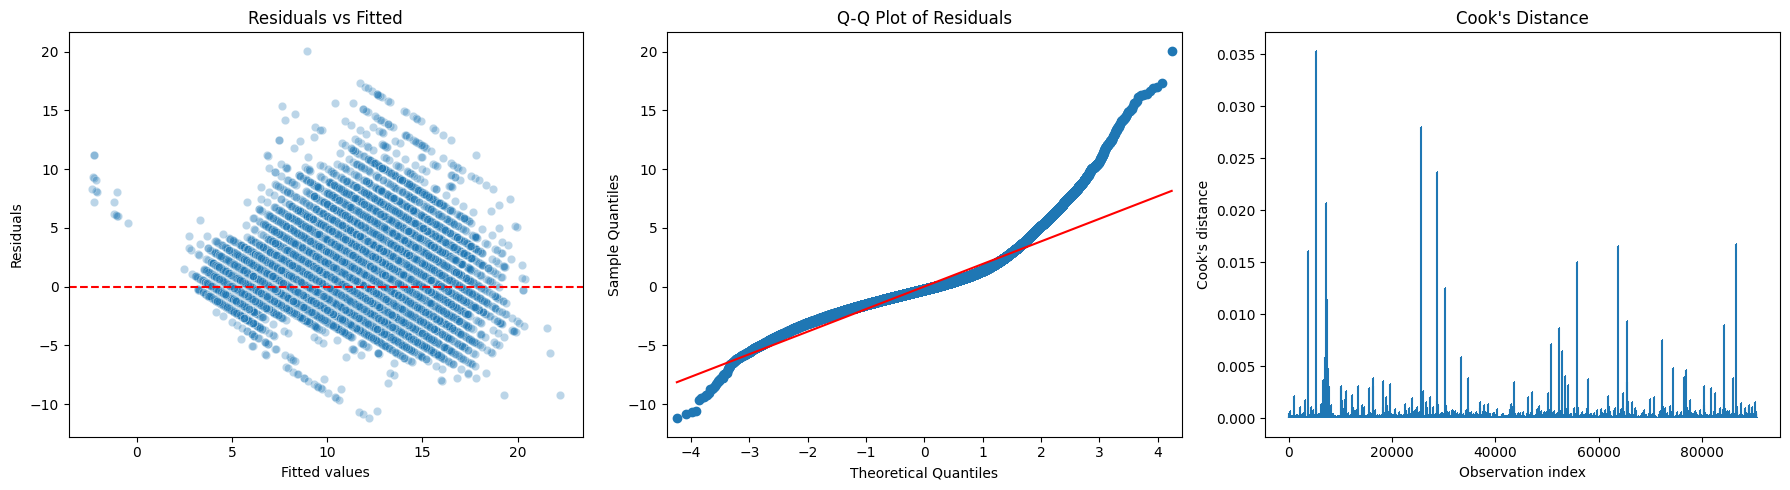

In [9]:
# --- Residuals ---
residuals = spline_model.resid
fitted = spline_model.fittedvalues

# --- Diagnostic Plots ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs Fitted
sns.scatterplot(x=fitted, y=residuals, ax=axes[0], alpha=0.3)
axes[0].axhline(0, linestyle='--', color='red')
axes[0].set_title('Residuals vs Fitted')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')

# 2. Q-Q Plot
qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

# 3. Cook’s Distance Plot
influence = OLSInfluence(spline_model)
cooks_d = influence.cooks_distance[0]
axes[2].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
axes[2].set_title("Cook's Distance")
axes[2].set_xlabel('Observation index')
axes[2].set_ylabel("Cook's distance")

plt.tight_layout()
plt.show()

**Assumption Diagnostics Interpretation**

* Residuals vs. Fitted: The residuals are fairly centered around zero. It looks like some heteroscedasticity may be present. The spread increases with fitted values, suggesting non-constant variance.

* Q-Q Plot: There is moderate deviation from the diagonal line, especially in the tails. This indicates mild non-normality in residuals. However, with a large sample size (90,615), this is less critical.

* Cook's Distance: There are a few observations (Cook's D > 0.05), but no extreme values affecting model stability substantially.

In [10]:
# Create a design matrix for test data using only the RHS of the formula (predictors)
rhs_formula = spline_formula_fixed.split('~')[1].strip()  # Extract RHS only
X_test = patsy.dmatrix(rhs_formula, data=test_df_clean, return_type='dataframe')

# Predict using the spline model
test_predictions = spline_model.predict(X_test)

# Clip negative predictions to zero
test_predictions_clipped = test_predictions.clip(lower=0)

# Format predictions into a submission DataFrame
submission_spline = pd.DataFrame({
    'id': test_df_clean['id'],
    'Rings': test_predictions_clipped
})

submission_spline.head()


,id,Rings
0,90615,8.087791
1,90616,9.605274
2,90617,10.545962
3,90618,10.396696
4,90619,7.835762
